In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

the proejct period was 10 days only so I worked hard to deliver this accuracy for the models
the data obtained from the company was cleaned on microsoft excel firstly without deleting the outliers and the reason for that is i made 16 total trials for 4 projects on the same data set and each trial was with different features selected to enhance the accuracy of the model. also i used python to delete the outliers from the features selected only without saving these changes to keep the original cleaned data for further trials.

cleaning involved: 
-------------------
1- checking fon non logical values like negative percent values, scientifically non logical values because data science isn't only about using tools only it's about using your brain and your chemical engineering background aided with text books to know which values are logical and which values aren't.

2- checking for duplicates and removing them ( no duplicates were found )

3- checking for ref errors and dealing with them

4-checking for bland cells and removing them as we don't want to fill the blanks with any sort of method to keep the accuracy of the model high or as near as real life

TAKING INTO CONSIDERATION:
initial and final setting time scientifically depends on other parameters that could enhance the results but the time frame of the project and data wasn't enough to build an accurate one also the features were chosen depending on scientific research 

In [86]:
df_raw = pd.read_excel("D:\internship data\intern data.xlsx" , sheet_name = "raw")

In [87]:
df_raw

,Unnamed: 0,Chemical Analysis,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 20,Unnamed: 21,Physical Results,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,St.Cons.,Setting Time,NaN,Comp. Strength,NaN,Fineness,NaN,NaN
1,Class,SiO2,Al2O3,Fe2O3,CaO,MgO,SO3,K2O,Na2O,Cl,...,C3A,C4AF,%,Initial,Final,2 d,28 d,Blaine,45 m R,90 m R
2,"CEM I 42,5 N",19.43,4.38,3.59,61.77,2.84,3.29,0.4,0.29,0.04,...,5.5399,10.9136,25.2,170,265,21.3,46.5,3290,18.3,2.7
3,"CEM I 42,5 N",19.49,4.62,3.57,61.93,2.89,3.03,0.4,0.3,0.04,...,6.2097,10.8528,25,160,265,21.3,45.9,3320,20.5,4.1
4,"CEM I 42,5 N",19.69,4.29,4.06,60.93,2.66,3.19,0.35,0.28,0.04,...,4.5071,12.3424,25,165,265,20.5,46.4,3290,18.7,3.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,"CEM I 42,5 N",20.52,4.39,4.69,59.68,3.57,3,0.3,0.23,0.04,...,3.7074,14.2576,26,170,235,21.6,48.6,3710,19.8,4.2
1461,"CEM I 42,5 N",20.41,4.36,4.67,59.73,3.51,3.52,0.3,0.23,0.04,...,3.6617,14.1968,26,175,245,19.5,47.1,3570,17.6,3.8
1462,"CEM I 42,5 N",20.56,4.38,4.68,59.85,3.9,3.06,0.31,0.24,0.04,...,3.6978,14.2272,26.2,165,240,22.6,48.3,3210,21.9,4.1
1463,"CEM I 42,5 N",21.86,6.38,4.14,55.71,4.07,3.46,0.34,0.21,0.04,...,9.9104,12.5856,25.8,175,260,21.7,47.5,3720,16.3,3.3


INITIAL SETTING  TIME

importing data and describing it

In [88]:
df = pd.read_excel("D:\internship data\intern data.xlsx" , sheet_name = "cleaned data" )

In [89]:
df

,Class,SiO2,Al2O3,Fe2O3,CaO,MgO,SO3,K2O,Na2O,Cl,...,Initial,Final,2 d,28 d,Blaine,45 m R,90 m R,Cao_free,Unnamed: 31,diff
0,"CEM I 42,5 N",19.43,4.38,3.59,61.77,2.84,3.29,0.40,0.29,0.04,...,170,265,21.3,46.5,3290,18.3,2.7,1.22,20.801055,0.498945
1,"CEM I 42,5 N",19.49,4.62,3.57,61.93,2.89,3.03,0.40,0.30,0.04,...,160,265,21.3,45.9,3320,20.5,4.1,1.35,21.119374,0.180626
2,"CEM I 42,5 N",19.69,4.29,4.06,60.93,2.66,3.19,0.35,0.28,0.04,...,165,265,20.5,46.4,3290,18.7,3.2,1.40,20.205139,0.294861
3,"CEM I 42,5 N",18.88,4.41,3.54,61.84,2.80,3.16,0.43,0.31,0.04,...,170,265,21.9,47.3,3340,18.7,3.5,1.30,20.792741,1.107259
4,"CEM I 42,5 N",19.22,4.25,3.74,61.65,2.83,3.02,0.41,0.28,0.04,...,160,270,22.0,46.3,3160,19.5,3.5,1.64,20.284507,1.715493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,"CEM I 42,5 N",20.52,4.39,4.69,59.68,3.57,3.00,0.30,0.23,0.04,...,170,235,21.6,48.6,3710,19.8,4.2,NaN,19.184548,2.415452
1447,"CEM I 42,5 N",20.41,4.36,4.67,59.73,3.51,3.52,0.30,0.23,0.04,...,175,245,19.5,47.1,3570,17.6,3.8,NaN,19.601347,0.101347
1448,"CEM I 42,5 N",20.56,4.38,4.68,59.85,3.90,3.06,0.31,0.24,0.04,...,165,240,22.6,48.3,3210,21.9,4.1,NaN,19.656448,2.943552
1449,"CEM I 42,5 N",21.86,6.38,4.14,55.71,4.07,3.46,0.34,0.21,0.04,...,175,260,21.7,47.5,3720,16.3,3.3,NaN,23.724581,2.024581


In [90]:
df.head()

,Class,SiO2,Al2O3,Fe2O3,CaO,MgO,SO3,K2O,Na2O,Cl,...,Initial,Final,2 d,28 d,Blaine,45 m R,90 m R,Cao_free,Unnamed: 31,diff
0,"CEM I 42,5 N",19.43,4.38,3.59,61.77,2.84,3.29,0.40,0.29,0.04,...,170,265,21.3,46.5,3290,18.3,2.7,1.22,20.801055,0.498945
1,"CEM I 42,5 N",19.49,4.62,3.57,61.93,2.89,3.03,0.40,0.30,0.04,...,160,265,21.3,45.9,3320,20.5,4.1,1.35,21.119374,0.180626
2,"CEM I 42,5 N",19.69,4.29,4.06,60.93,2.66,3.19,0.35,0.28,0.04,...,165,265,20.5,46.4,3290,18.7,3.2,1.40,20.205139,0.294861
3,"CEM I 42,5 N",18.88,4.41,3.54,61.84,2.80,3.16,0.43,0.31,0.04,...,170,265,21.9,47.3,3340,18.7,3.5,1.30,20.792741,1.107259
4,"CEM I 42,5 N",19.22,4.25,3.74,61.65,2.83,3.02,0.41,0.28,0.04,...,160,270,22.0,46.3,3160,19.5,3.5,1.64,20.284507,1.715493


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1451 entries, 0 to 1450
Data columns (total 33 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Class        1451 non-null   object 
 1   SiO2         1451 non-null   float64
 2   Al2O3        1451 non-null   float64
 3   Fe2O3        1451 non-null   float64
 4   CaO          1451 non-null   float64
 5   MgO          1451 non-null   float64
 6   SO3          1451 non-null   float64
 7   K2O          1451 non-null   float64
 8   Na2O         1451 non-null   float64
 9   Cl           1451 non-null   float64
 10  LOI          1451 non-null   float64
 11  IR.          109 non-null    float64
 12  CaOfree      0 non-null      float64
 13  A.Eq         1451 non-null   float64
 14  Total        1451 non-null   float64
 15  LSF          1451 non-null   float64
 16  SM           1451 non-null   float64
 17  AM           1451 non-null   float64
 18  C3S          1451 non-null   float64
 19  C2S   

<Axes: >

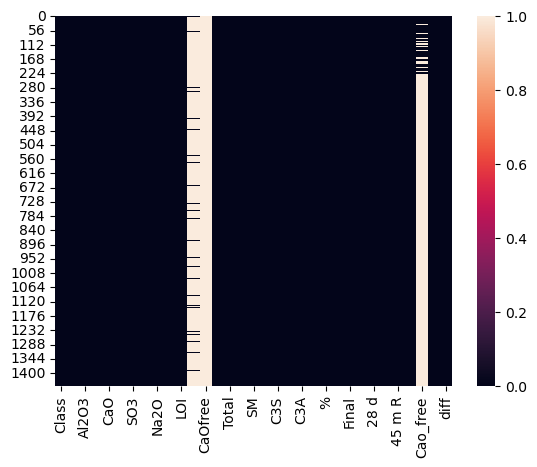

In [92]:
sns.heatmap(df.isna())

In [93]:
df.columns

Index(['Class', 'SiO2', 'Al2O3', 'Fe2O3', 'CaO', 'MgO', 'SO3', 'K2O', 'Na2O',
       'Cl', 'LOI', 'IR.', 'CaOfree', 'A.Eq', 'Total', 'LSF', 'SM', 'AM',
       'C3S', 'C2S', 'C3A', 'C4AF', '%', 'Initial', 'Final', '2 d', '28 d',
       'Blaine', '45 m R', '90 m R', 'Cao_free', 'Unnamed: 31', 'diff'],
      dtype='object')

In [94]:
df.describe()

,SiO2,Al2O3,Fe2O3,CaO,MgO,SO3,K2O,Na2O,Cl,LOI,...,Initial,Final,2 d,28 d,Blaine,45 m R,90 m R,Cao_free,Unnamed: 31,diff
count,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,...,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,153.000000,1451.000000,1451.000000
mean,19.413887,4.246106,3.897905,61.244094,2.954176,3.117884,0.341633,0.304521,0.040034,3.450069,...,158.050310,255.656788,19.980703,45.766988,3222.364576,19.634114,4.237905,1.385948,19.953479,1.057942
std,0.503901,0.193082,0.243992,0.647538,0.342582,0.171677,0.065518,0.093945,0.001144,0.323469,...,9.472841,9.879309,1.375981,1.037267,158.323475,2.023885,0.902806,0.251988,0.612124,0.722874
min,18.030000,3.600000,3.410000,55.710000,2.090000,2.130000,0.150000,0.150000,0.030000,1.650000,...,130.000000,220.000000,16.000000,42.500000,2870.000000,6.600000,0.500000,1.000000,18.274622,0.000408
25%,19.100000,4.120000,3.710000,60.940000,2.730000,3.020000,0.300000,0.240000,0.040000,3.270000,...,150.000000,250.000000,18.900000,45.100000,3130.000000,18.600000,3.700000,1.240000,19.510955,0.480748
50%,19.350000,4.250000,3.850000,61.330000,2.930000,3.120000,0.350000,0.270000,0.040000,3.480000,...,160.000000,255.000000,20.000000,45.700000,3190.000000,19.800000,4.300000,1.360000,20.023357,0.967180
75%,19.650000,4.370000,4.060000,61.660000,3.140000,3.230000,0.380000,0.360000,0.040000,3.670000,...,165.000000,260.000000,21.000000,46.400000,3270.000000,20.800000,4.800000,1.460000,20.388648,1.505079
max,21.910000,6.380000,4.900000,63.010000,4.100000,3.690000,0.530000,0.670000,0.050000,4.720000,...,185.000000,285.000000,23.700000,49.500000,4190.000000,26.400000,7.900000,3.290000,23.724581,3.833000


visualizing some data

for setting time

In [95]:
x_train_initial = df[[ "SO3" , "C3A" , "MgO" , "%" , "A.Eq"]]
x_train_final = df[[ "SO3" , "C3A" , "MgO" , "%" , "A.Eq"]]

#x_train_initial = df[[ "SO3" , "C3A" , "MgO" , "%" ]]
#x_train_final = df[[ "SO3" , "C3A" , "MgO" , "%" ]]

#x_train_initial = df[[ "SO3" , "C3A"  , "%" , "A.Eq"]]
#x_train_final = df[[ "SO3" , "C3A"  , "%" , "A.Eq"]]

y_train_initial = df['Initial']
y_train_final = df['Final']

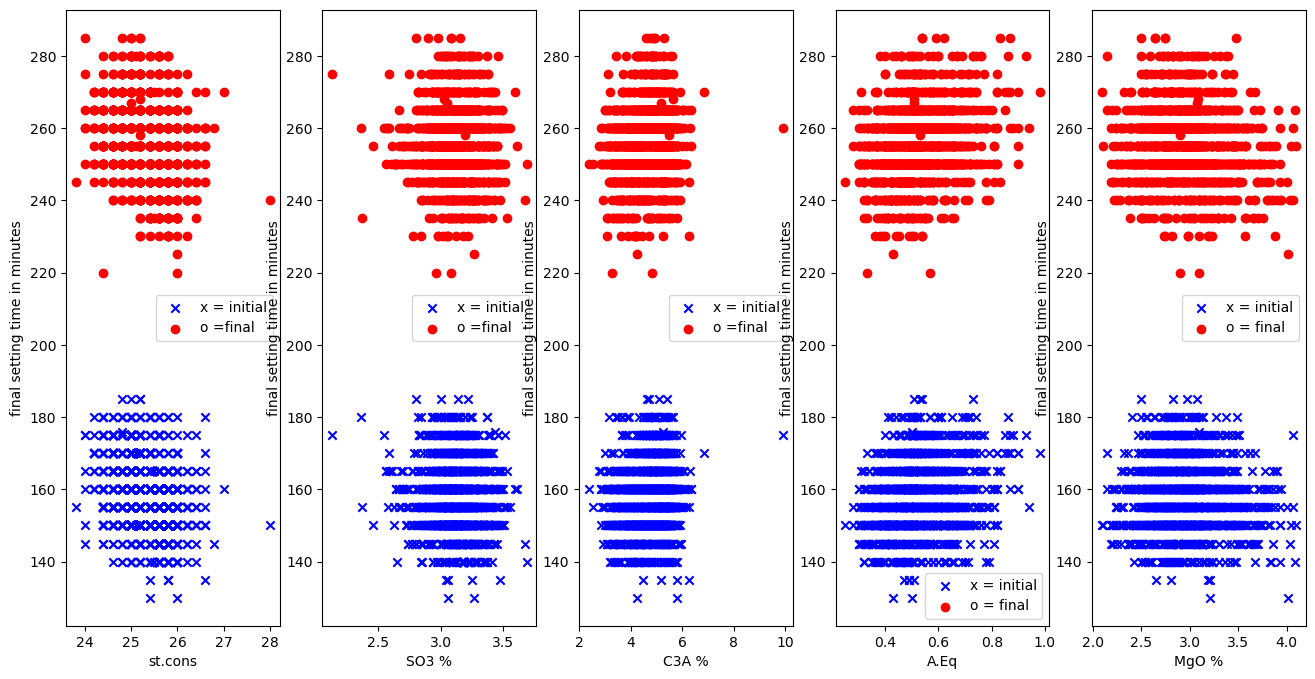

In [96]:
fig , ax = plt.subplots(1 , 5 , figsize = (16 ,8))

ax[0].scatter(x_train_initial["%"] , y_train_initial, marker = "x" , c = "b" , label = "x = initial")
ax[0].scatter(x_train_initial["%"] , y_train_final, marker = "o" , c = "r" , label = "o =final ")
ax[0].set_xlabel("st.cons")
ax[0].set_ylabel("final setting time in minutes")
ax[0].legend()

ax[1].scatter(x_train_initial["SO3"] , y_train_initial, marker = "x" , c = "b" , label = "x = initial")
ax[1].scatter(x_train_initial["SO3"] , y_train_final, marker = "o" , c = "r" , label = "o =final ")
ax[1].set_xlabel("SO3 %")
ax[1].set_ylabel("final setting time in minutes")
ax[1].legend()

ax[2].scatter(x_train_initial["C3A"] , y_train_initial, marker = "x" , c = "b" , label = "x = initial")
ax[2].scatter(x_train_initial["C3A"] , y_train_final, marker = "o" , c = "r" , label = "o =final ")
ax[2].set_xlabel("C3A %")
ax[2].set_ylabel("final setting time in minutes")
ax[2].legend()

ax[3].scatter(x_train_initial["A.Eq"] , y_train_initial , marker = "x" , c = "b" , label = "x = initial")
ax[3].scatter(x_train_initial["A.Eq"] , y_train_final , marker = "o" , c = "r" , label = "o = final")
ax[3].set_xlabel("A.Eq")
ax[3].set_ylabel("final setting time in minutes")
ax[3].legend()

ax[4].scatter(x_train_initial["MgO"] , y_train_initial, marker = "x" , c = "b" , label = "x = initial")
ax[4].scatter(x_train_initial["MgO"] , y_train_final, marker = "o" , c = "r" , label = "o = final ")
ax[4].set_xlabel("MgO %")
ax[4].set_ylabel("final setting time in minutes")
ax[4].legend()

<Axes: xlabel='C3A'>

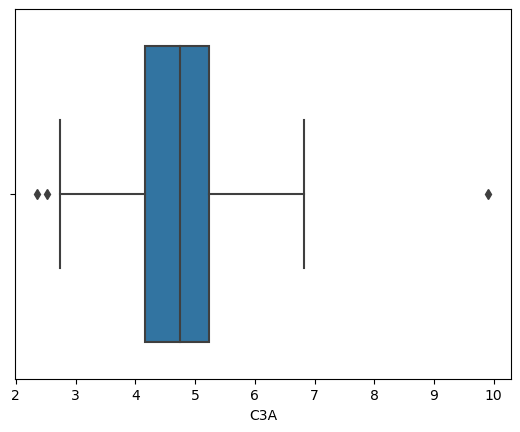

In [97]:
sns.boxplot(x = df["C3A"])

In [98]:
df1 = df[df["C3A"]>2.8]

In [99]:
df1 = df1[df1["C3A"] <9 ] 

In [100]:
df1 = df1[df1["C3A"]>2.8]

In [101]:
df1

,Class,SiO2,Al2O3,Fe2O3,CaO,MgO,SO3,K2O,Na2O,Cl,...,Initial,Final,2 d,28 d,Blaine,45 m R,90 m R,Cao_free,Unnamed: 31,diff
0,"CEM I 42,5 N",19.43,4.38,3.59,61.77,2.84,3.29,0.40,0.29,0.04,...,170,265,21.3,46.5,3290,18.3,2.7,1.22,20.801055,0.498945
1,"CEM I 42,5 N",19.49,4.62,3.57,61.93,2.89,3.03,0.40,0.30,0.04,...,160,265,21.3,45.9,3320,20.5,4.1,1.35,21.119374,0.180626
2,"CEM I 42,5 N",19.69,4.29,4.06,60.93,2.66,3.19,0.35,0.28,0.04,...,165,265,20.5,46.4,3290,18.7,3.2,1.40,20.205139,0.294861
3,"CEM I 42,5 N",18.88,4.41,3.54,61.84,2.80,3.16,0.43,0.31,0.04,...,170,265,21.9,47.3,3340,18.7,3.5,1.30,20.792741,1.107259
4,"CEM I 42,5 N",19.22,4.25,3.74,61.65,2.83,3.02,0.41,0.28,0.04,...,160,270,22.0,46.3,3160,19.5,3.5,1.64,20.284507,1.715493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445,"CEM I 42,5 N",20.20,4.39,4.62,59.20,3.49,3.37,0.29,0.22,0.04,...,180,255,21.3,47.4,4030,16.8,3.0,NaN,19.414016,1.885984
1446,"CEM I 42,5 N",20.52,4.39,4.69,59.68,3.57,3.00,0.30,0.23,0.04,...,170,235,21.6,48.6,3710,19.8,4.2,NaN,19.184548,2.415452
1447,"CEM I 42,5 N",20.41,4.36,4.67,59.73,3.51,3.52,0.30,0.23,0.04,...,175,245,19.5,47.1,3570,17.6,3.8,NaN,19.601347,0.101347
1448,"CEM I 42,5 N",20.56,4.38,4.68,59.85,3.90,3.06,0.31,0.24,0.04,...,165,240,22.6,48.3,3210,21.9,4.1,NaN,19.656448,2.943552


<Axes: xlabel='C3A'>

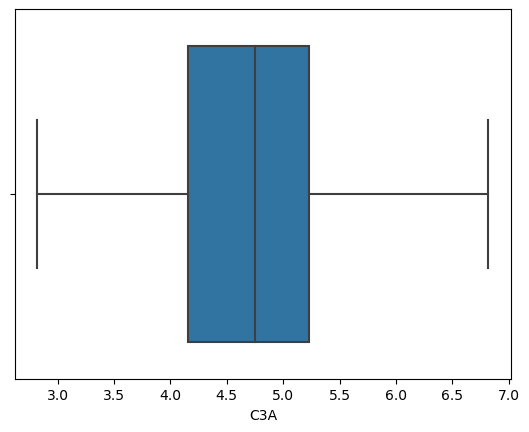

In [102]:
sns.boxplot(x = df1["C3A"])

<Axes: xlabel='SO3'>

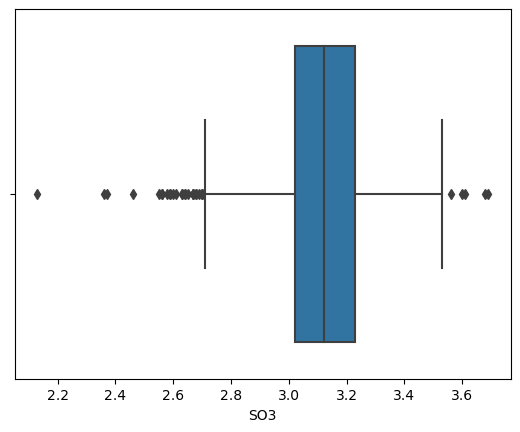

In [103]:
sns.boxplot(x = df["SO3"])

In [104]:
df1 = df1[df1["SO3"] < 3.5]
df1 = df1[df1["SO3"] > 2.7]

<Axes: xlabel='SO3'>

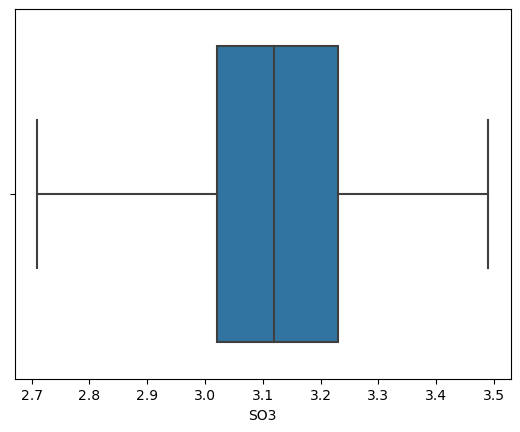

In [105]:
sns.boxplot(x = df1["SO3"])

<Axes: xlabel='%'>

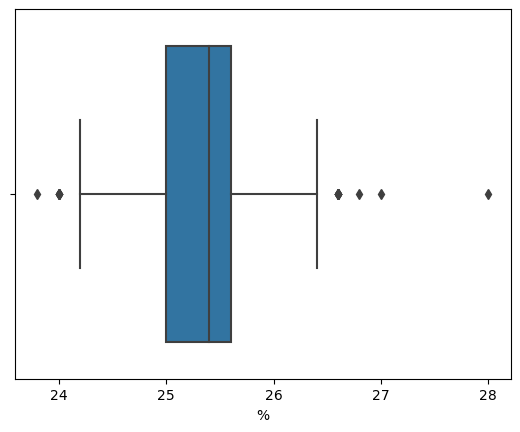

In [106]:
sns.boxplot(x = df["%"])

In [107]:
df1 = df1[df1["%"]<26.5]
df1 = df1[df1["%"]>24.2]

<Axes: xlabel='%'>

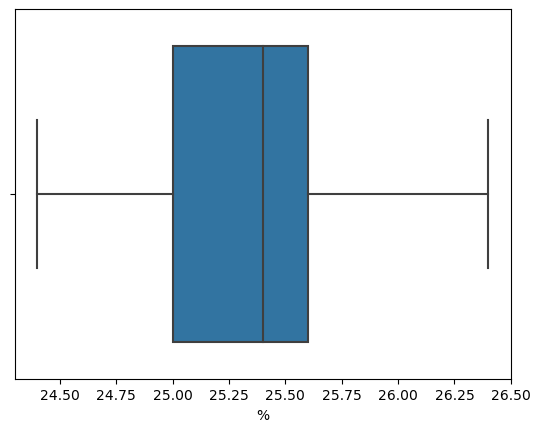

In [108]:
sns.boxplot(x = df1["%"])

<Axes: xlabel='MgO'>

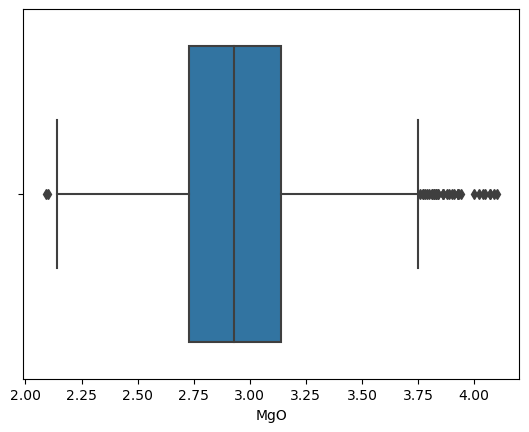

In [109]:
sns.boxplot(x=df["MgO"])

In [110]:
df1 = df1[df1["MgO"]<3.7]
df1 = df1[df1["MgO"]>2.125]

<Axes: xlabel='MgO'>

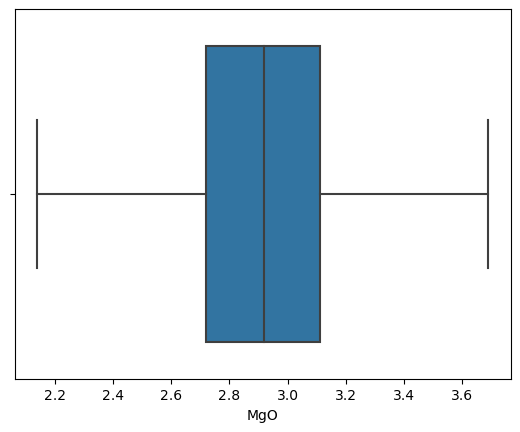

In [111]:
sns.boxplot(x=df1["MgO"])

<Axes: xlabel='A.Eq'>

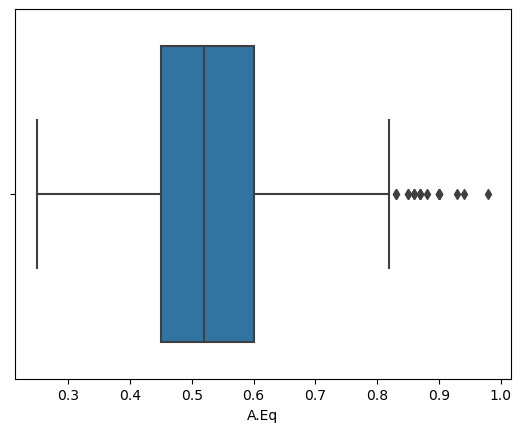

In [112]:
sns.boxplot(x=df["A.Eq"])

In [113]:
df1 = df1[df1["A.Eq"]<0.8]
df1 = df1[df1["A.Eq"]>0.25]

<Axes: xlabel='A.Eq'>

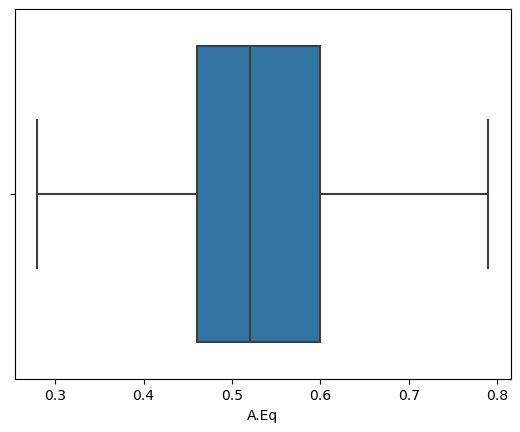

In [114]:
sns.boxplot(x=df1["A.Eq"])

In [115]:
df = df1

In [116]:
x_train_initial = df[[ "SO3" , "C3A" , "MgO" , "%" , "A.Eq"]]
x_train_final = df[[ "SO3" , "C3A" , "MgO" , "%" , "A.Eq"]]

#x_train_initial = df[[ "SO3" , "C3A" , "MgO" , "%" ]]
#x_train_final = df[[ "SO3" , "C3A" , "MgO" , "%" ]]

#x_train_initial = df[[ "SO3" , "C3A"  , "%" , "A.Eq"]]
#x_train_final = df[[ "SO3" , "C3A"  , "%" , "A.Eq"]]

y_train_initial = df['Initial']
y_train_final = df['Final']

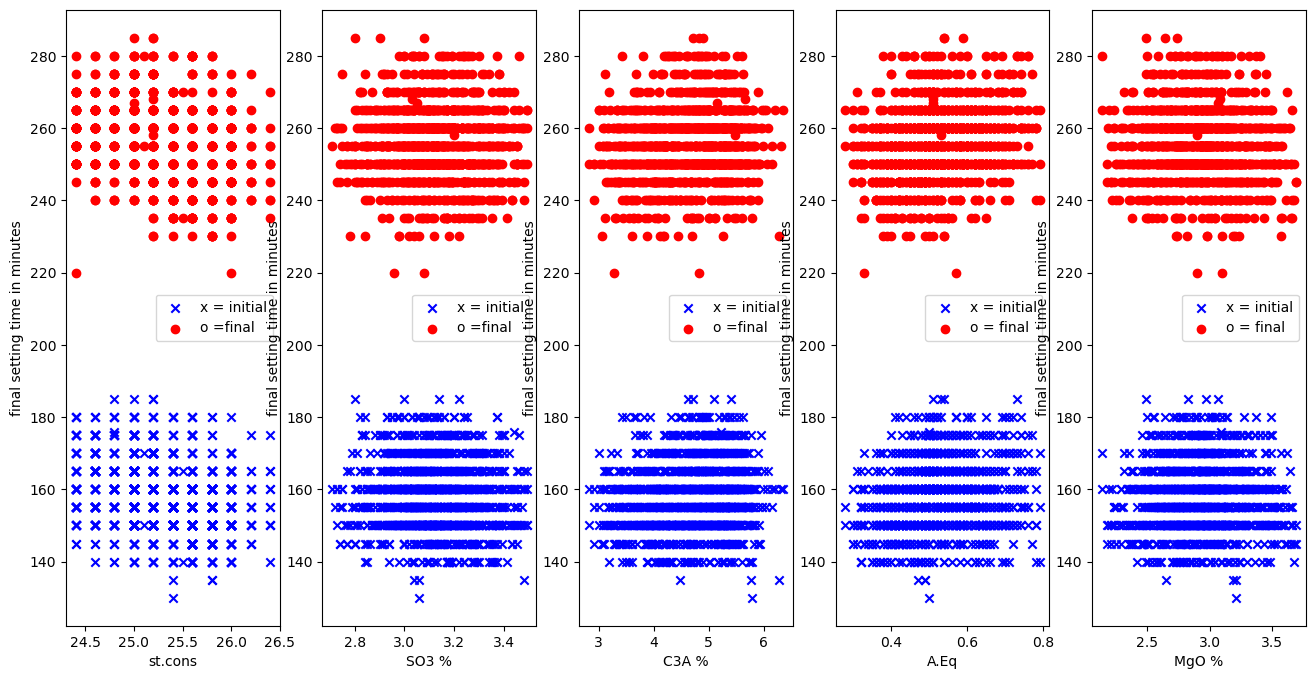

In [117]:
fig , ax = plt.subplots(1 , 5 , figsize = (16 ,8))

ax[0].scatter(x_train_initial["%"] , y_train_initial, marker = "x" , c = "b" , label = "x = initial")
ax[0].scatter(x_train_initial["%"] , y_train_final, marker = "o" , c = "r" , label = "o =final ")
ax[0].set_xlabel("st.cons")
ax[0].set_ylabel("final setting time in minutes")
ax[0].legend()

ax[1].scatter(x_train_initial["SO3"] , y_train_initial, marker = "x" , c = "b" , label = "x = initial")
ax[1].scatter(x_train_initial["SO3"] , y_train_final, marker = "o" , c = "r" , label = "o =final ")
ax[1].set_xlabel("SO3 %")
ax[1].set_ylabel("final setting time in minutes")
ax[1].legend()

ax[2].scatter(x_train_initial["C3A"] , y_train_initial, marker = "x" , c = "b" , label = "x = initial")
ax[2].scatter(x_train_initial["C3A"] , y_train_final, marker = "o" , c = "r" , label = "o =final ")
ax[2].set_xlabel("C3A %")
ax[2].set_ylabel("final setting time in minutes")
ax[2].legend()

ax[3].scatter(x_train_initial["A.Eq"] , y_train_initial , marker = "x" , c = "b" , label = "x = initial")
ax[3].scatter(x_train_initial["A.Eq"] , y_train_final , marker = "o" , c = "r" , label = "o = final")
ax[3].set_xlabel("A.Eq")
ax[3].set_ylabel("final setting time in minutes")
ax[3].legend()

ax[4].scatter(x_train_initial["MgO"] , y_train_initial, marker = "x" , c = "b" , label = "x = initial")
ax[4].scatter(x_train_initial["MgO"] , y_train_final, marker = "o" , c = "r" , label = "o = final ")
ax[4].set_xlabel("MgO %")
ax[4].set_ylabel("final setting time in minutes")
ax[4].legend()

In [118]:
df

,Class,SiO2,Al2O3,Fe2O3,CaO,MgO,SO3,K2O,Na2O,Cl,...,Initial,Final,2 d,28 d,Blaine,45 m R,90 m R,Cao_free,Unnamed: 31,diff
0,"CEM I 42,5 N",19.43,4.38,3.59,61.77,2.84,3.29,0.40,0.29,0.04,...,170,265,21.3,46.5,3290,18.3,2.7,1.22,20.801055,0.498945
1,"CEM I 42,5 N",19.49,4.62,3.57,61.93,2.89,3.03,0.40,0.30,0.04,...,160,265,21.3,45.9,3320,20.5,4.1,1.35,21.119374,0.180626
2,"CEM I 42,5 N",19.69,4.29,4.06,60.93,2.66,3.19,0.35,0.28,0.04,...,165,265,20.5,46.4,3290,18.7,3.2,1.40,20.205139,0.294861
3,"CEM I 42,5 N",18.88,4.41,3.54,61.84,2.80,3.16,0.43,0.31,0.04,...,170,265,21.9,47.3,3340,18.7,3.5,1.30,20.792741,1.107259
4,"CEM I 42,5 N",19.22,4.25,3.74,61.65,2.83,3.02,0.41,0.28,0.04,...,160,270,22.0,46.3,3160,19.5,3.5,1.64,20.284507,1.715493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,"CEM I 42,5 N",20.65,4.31,4.61,59.77,3.69,2.87,0.28,0.24,0.04,...,150,245,19.8,46.2,3130,21.2,4.4,NaN,19.493265,0.306735
1439,"CEM I 42,5 N",20.52,4.24,4.61,59.51,3.65,2.94,0.28,0.23,0.04,...,145,235,21.6,47.0,3150,20.8,4.8,NaN,19.268171,2.331829
1444,"CEM I 42,5 N",20.37,4.47,4.67,60.25,3.38,3.07,0.31,0.22,0.04,...,165,240,21.1,46.9,3950,16.9,1.3,NaN,19.470241,1.629759
1445,"CEM I 42,5 N",20.20,4.39,4.62,59.20,3.49,3.37,0.29,0.22,0.04,...,180,255,21.3,47.4,4030,16.8,3.0,NaN,19.414016,1.885984


C:\Users\Abdelaleem\AppData\Local\Temp\ipykernel_27232\3401009668.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr()


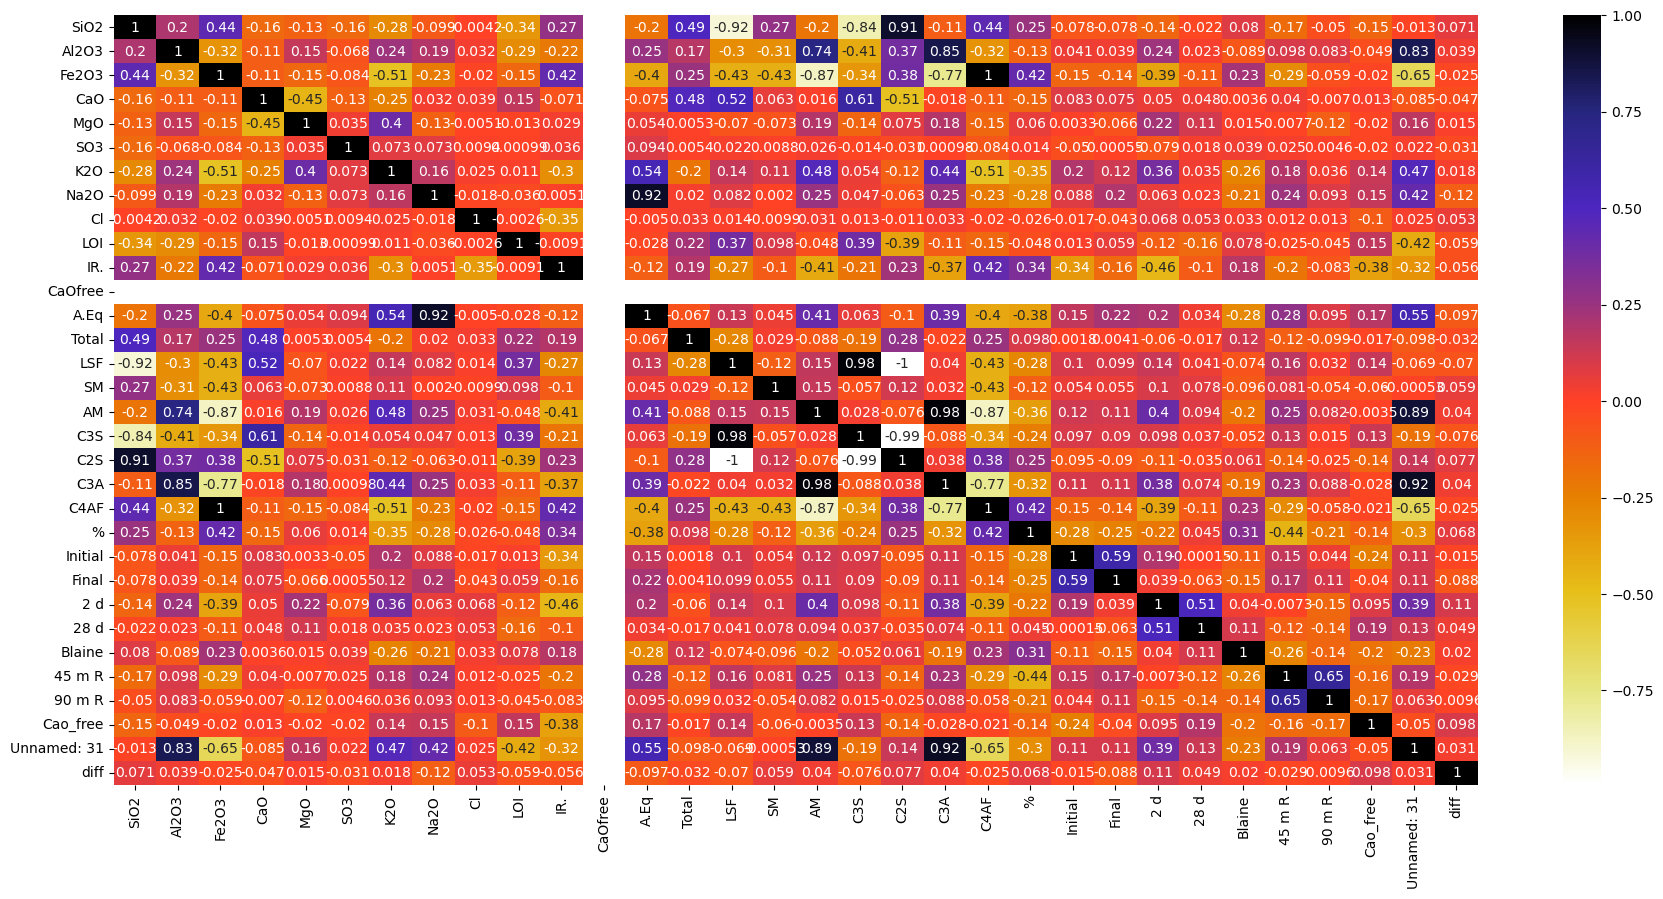

In [119]:
plt.figure(figsize = (22 , 10))
cor = df.corr()
sns.heatmap(cor , annot = True , cmap = plt.cm.CMRmap_r)
plt.show()

making the machine learning model

In [120]:
# for building linear regression models and preparing data
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Index(['Class', 'SiO2', 'Al2O3', 'Fe2O3', 'CaO', 'MgO', 'SO3', 'K2O', 'Na2O',
       'Cl', 'LOI', 'IR.', 'CaOfree', 'A.Eq', 'Total', 'LSF', 'SM', 'AM',
       'C3S', 'C2S', 'C3A', 'C4AF', '%', 'Initial', 'Final', '2 d', '28 d',
       'Blaine', '45 m R', '90 m R', 'Cao_free'],
      dtype='object')

In [121]:
x_train_initial = df[[ "K2O" , "LSF" , "A.Eq" , "45 m R" , "AM" , "C3A" , "Blaine"]]
x_train_final = df[[ "SO3" , "C3A" , "MgO" , "%" , "A.Eq"]]
y_train_initial = df['Initial']
y_train_final = df['Final']

working for initial setting time
x_train_initial = df[["SO3" , "C3A" , "MgO" , "%" , "A.Eq"]]
y_train_initial = df['Initial']

In [122]:
# Convert 1-D arrays into 2-D because the commands later will require it

y = np.expand_dims(y_train_final, axis=1)


print(f"the shape of the targets y is: {y.shape}")

the shape of the targets y is: (1302, 1)


In [123]:
# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
x_train, x_, y_train, y_ = train_test_split(x_train_final, y, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.50, random_state=1)

# Delete temporary variables
del x_, y_

print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")
print(f"the shape of the test set (input) is: {x_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}")

the shape of the training set (input) is: (781, 5)
the shape of the training set (target) is: (781, 1)

the shape of the cross validation set (input) is: (260, 5)
the shape of the cross validation set (target) is: (260, 1)

the shape of the test set (input) is: (261, 5)
the shape of the test set (target) is: (261, 1)


Feature scaling

In [124]:
# Initialize the class
#scaler_linear = StandardScaler()

# Compute the mean and standard deviation of the training set then transform it
#X_train_scaled = scaler_linear.fit_transform(x_train)


training the model

In [125]:
# Initialize the class
linear_model = LinearRegression()

# Train the model
linear_model.fit(x_train, y_train)

LinearRegression()

In [127]:
# Feed the scaled training set and get the predictions
yhat = linear_model.predict(x_train)

# Use scikit-learn's utility function and divide by 2
print(f"training MSE (using sklearn function): {mean_squared_error(y_train, yhat) / 2}")

# for-loop implementation
total_squared_error = 0

for i in range(len(yhat)):
    squared_error_i  = (yhat[i] - y_train[i])**2
    total_squared_error += squared_error_i                                              

mse = total_squared_error / (2*len(yhat))

print(f"training MSE (for-loop implementation): {mse.squeeze()}")

training MSE (using sklearn function): 44.85182201996099
training MSE (for-loop implementation): 44.851822019961


In [128]:
# Scale the cross validation set using the mean and standard deviation of the training set
#X_cv_scaled = scaler_linear.transform(x_cv)

#print(f"Mean used to scale the CV set: {scaler_linear.mean_.squeeze():.2f}")
#print(f"Standard deviation used to scale the CV set: {scaler_linear.scale_.squeeze():.2f}")

# Feed the scaled cross validation set
yhat = linear_model.predict(x_cv)

# Use scikit-learn's utility function and divide by 2
print(f"Cross validation MSE: {mean_squared_error(y_cv, yhat) / 2}")

Cross validation MSE: 42.30479097607438


In [132]:
b = linear_model.intercept_
w = linear_model.coef_
print( b , w)

[337.27807629] [[ 1.22822513  0.17575988 -3.01868352 -3.35696751 15.11076109]]


adding polynomial features

In [137]:
def plot_train_cv_mses(degrees, train_mses, cv_mses, title):
    degrees = range(1,11)
    plt.plot(degrees, train_mses, marker='o', c='r', label='training MSEs'); 
    plt.plot(degrees, cv_mses, marker='o', c='b', label='CV MSEs'); 
    plt.title(title)
    plt.xlabel("degree"); 
    plt.ylabel("MSE"); 
    plt.legend()
    plt.show()


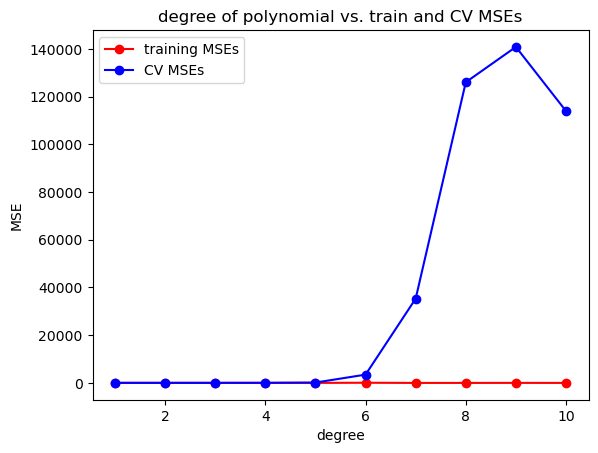

In [138]:
# Initialize lists containing the lists, models, and scalers
train_mses = []
cv_mses = []
models = []
scalers = []

# Loop over 10 times. Each adding one more degree of polynomial higher than the last.
for degree in range(1,11):
    
    # Add polynomial features to the training set
    poly = PolynomialFeatures(degree, include_bias=False)
    X_train_mapped = poly.fit_transform(x_train)
    
    # Scale the training set
    #scaler_poly = StandardScaler()
    #X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)
    #scalers.append(scaler_poly)
    
    # Create and train the model
    model = LinearRegression()
    model.fit(X_train_mapped, y_train )
    models.append(model)
    
    # Compute the training MSE
    yhat = model.predict(X_train_mapped)
    train_mse = mean_squared_error(y_train, yhat) / 2
    train_mses.append(train_mse)
    
    # Add polynomial features and scale the cross validation set
    poly = PolynomialFeatures(degree, include_bias=False)
    X_cv_mapped = poly.fit_transform(x_cv)
    #X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)
    
    # Compute the cross validation MSE
    yhat = model.predict(X_cv_mapped)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    cv_mses.append(cv_mse)
    
# Plot the results
degrees=range(1,11)
plot_train_cv_mses(degrees, train_mses, cv_mses, title="degree of polynomial vs. train and CV MSEs")

then we decide that linear model is the best model as both training mse and cv mse are the lowest

In [141]:
# Get the model with the lowest CV MSE (add 1 because list indices start at 0)
# This also corresponds to the degree of the polynomial added
degree = np.argmin(cv_mses) + 1
print(f"Lowest CV MSE is found in the model with degree={degree}")

Lowest CV MSE is found in the model with degree=2


You can then publish the generalization error by computing the test set's MSE. As usual, you should transform this data the same way you did with the training and cross validation sets.

In [146]:
polyreg = LinearRegression()
polyreg.fit(x_polynom , y_train)

LinearRegression()

In [151]:
b = polyreg.intercept_
w = polyreg.coef_
print( b , w)

[-607.16649458] [[ 0.00000000e+00  3.29393561e+01  1.83289781e+01 -1.86357631e+01
   7.13950231e+01 -2.58455207e+02  6.28532347e+00 -8.41152950e-01
   1.38351168e+01 -4.19796984e+00 -3.30005619e+00 -1.18085287e+00
   1.68662946e+00 -4.88902383e-01  4.92647179e+00 -5.10233174e+00
   5.12236266e-03 -1.13860186e+01 -1.29363172e+00  1.23296463e+01
  -1.75994252e+01]]


------------------------------------------------------------------------------------------------------------

FINAL SETTING TIME

In [153]:
# Convert 1-D arrays into 2-D because the commands later will require it

y_train_final = df['Final']

y = np.expand_dims(y_train_final, axis=1)

print(f"the shape of the targets y is: {y.shape}")

the shape of the targets y is: (1302, 1)


In [154]:
# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
x_train, x_, y_train, y_ = train_test_split(x_train_final, y, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.50, random_state=1)

# Delete temporary variables
del x_, y_

print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")
print(f"the shape of the test set (input) is: {x_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}")

the shape of the training set (input) is: (781, 5)
the shape of the training set (target) is: (781, 1)

the shape of the cross validation set (input) is: (260, 5)
the shape of the cross validation set (target) is: (260, 1)

the shape of the test set (input) is: (261, 5)
the shape of the test set (target) is: (261, 1)


In [155]:
# Initialize the class
linear_model = LinearRegression()

# Train the model
linear_model.fit(x_train, y_train)

LinearRegression()

In [156]:
# Feed the scaled training set and get the predictions
yhat = linear_model.predict(x_train)

# Use scikit-learn's utility function and divide by 2
print(f"training MSE (using sklearn function): {mean_squared_error(y_train, yhat) / 2}")

# for-loop implementation
total_squared_error = 0

for i in range(len(yhat)):
    squared_error_i  = (yhat[i] - y_train[i])**2
    total_squared_error += squared_error_i                                              

mse = total_squared_error / (2*len(yhat))

print(f"training MSE (for-loop implementation): {mse.squeeze()}")

training MSE (using sklearn function): 44.85182201996099
training MSE (for-loop implementation): 44.851822019961


In [157]:
# Feed the scaled cross validation set
yhat = linear_model.predict(x_cv)

# Use scikit-learn's utility function and divide by 2
print(f"Cross validation MSE: {mean_squared_error(y_cv, yhat) / 2}")

Cross validation MSE: 42.30479097607438


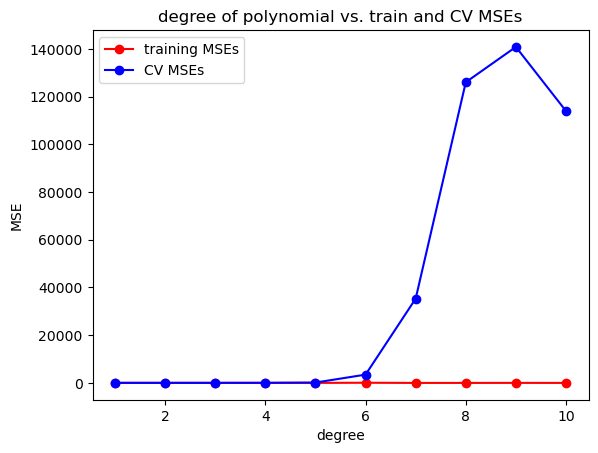

In [161]:
# Initialize lists containing the lists, models, and scalers
train_mses = []
cv_mses = []
models = []
scalers = []

# Loop over 10 times. Each adding one more degree of polynomial higher than the last.
for degree in range(1,11):
    
    # Add polynomial features to the training set
    poly = PolynomialFeatures(degree, include_bias=False)
    X_train_mapped = poly.fit_transform(x_train)
    
    # Scale the training set
    #scaler_poly = StandardScaler()
    #X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)
    #scalers.append(scaler_poly)
    
    # Create and train the model
    model = LinearRegression()
    model.fit(X_train_mapped, y_train )
    models.append(model)
    
    # Compute the training MSE
    yhat = model.predict(X_train_mapped)
    train_mse = mean_squared_error(y_train, yhat) / 2
    train_mses.append(train_mse)
    
    # Add polynomial features and scale the cross validation set
    poly = PolynomialFeatures(degree, include_bias=False)
    X_cv_mapped = poly.fit_transform(x_cv)
    #X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)
    
    # Compute the cross validation MSE
    yhat = model.predict(X_cv_mapped)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    cv_mses.append(cv_mse)
    
# Plot the results
degrees=range(1,11)
plot_train_cv_mses(degrees, train_mses, cv_mses, title="degree of polynomial vs. train and CV MSEs")

In [162]:
# Get the model with the lowest CV MSE (add 1 because list indices start at 0)
# This also corresponds to the degree of the polynomial added
degree = np.argmin(cv_mses) + 1
print(f"Lowest CV MSE is found in the model with degree={degree}")

Lowest CV MSE is found in the model with degree=2


In [163]:
# Initialize the class
polynom = PolynomialFeatures(degree = 2)
x_polynom = polynom.fit_transform(x_train)
x_polynom_test = polynom.fit_transform(x_test)


In [164]:
polyreg = LinearRegression()
polyreg.fit(x_polynom , y_train)

LinearRegression()

In [169]:
b = polyreg.intercept_
w = polyreg.coef_
print( b , w)

[-607.16649458] [[ 0.00000000e+00  3.29393561e+01  1.83289781e+01 -1.86357631e+01
   7.13950231e+01 -2.58455207e+02  6.28532347e+00 -8.41152950e-01
   1.38351168e+01 -4.19796984e+00 -3.30005619e+00 -1.18085287e+00
   1.68662946e+00 -4.88902383e-01  4.92647179e+00 -5.10233174e+00
   5.12236266e-03 -1.13860186e+01 -1.29363172e+00  1.23296463e+01
  -1.75994252e+01]]


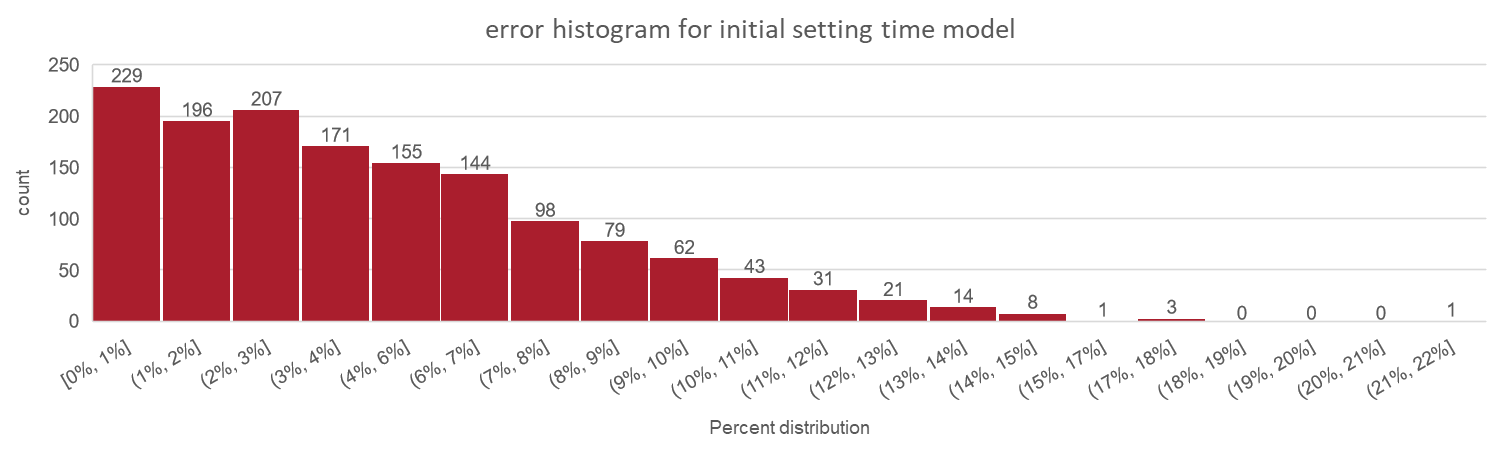

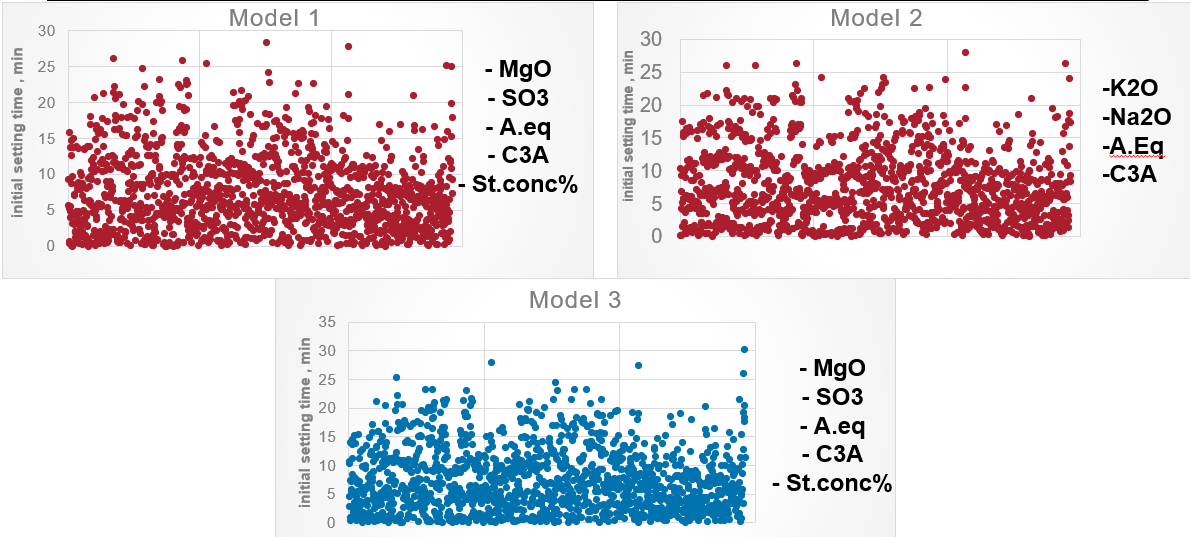

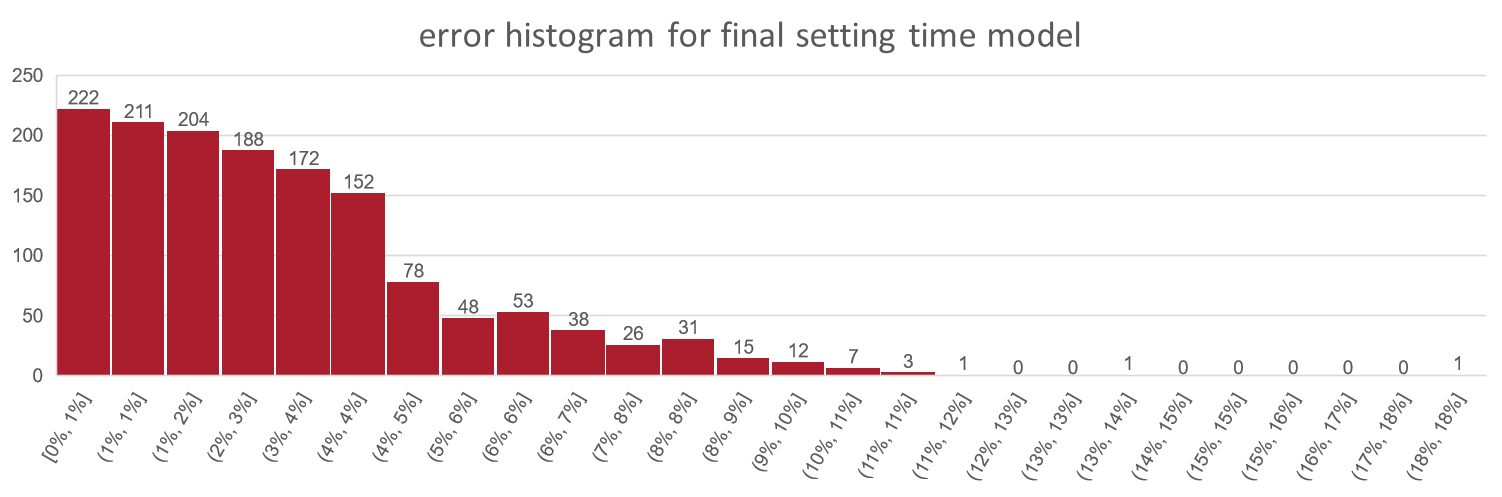

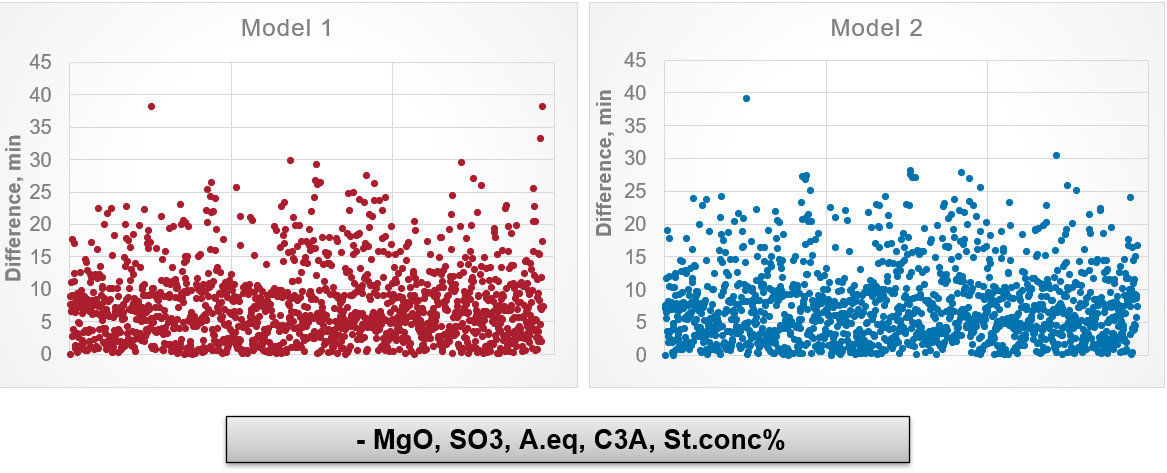

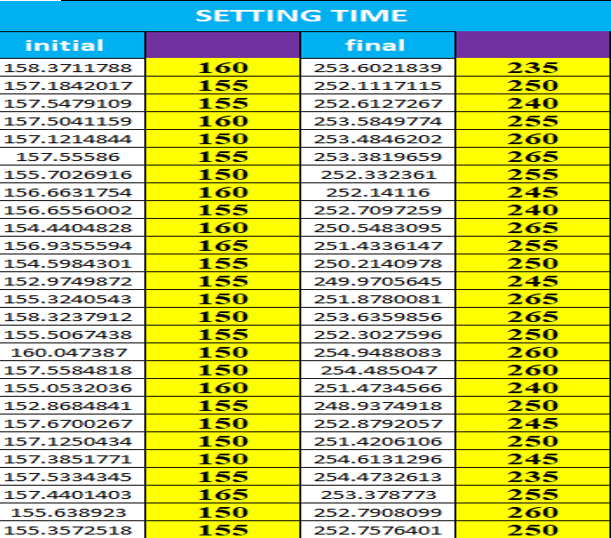